## Multiple Sclerosis Lesion Burden Estimates Using Portable Ultra-low-field Magnetic Resonance Imaging

T. Campbell Arnold1,2, Danni Tu3, Serhat V. Okar4, Govind Nair4, Samantha By5, Karan Kawatra4, Timothy E. Robert-Fitzgerald3, Lisa M. Desiderio6, Matthew K. Schindler7, Brian Litt1,2,7, Russell T. Shinohara2,3, Daniel S. Reich4, Joel M. Stein2,6

1. Department of Bioengineering, School of Engineering & Applied Science, University of Pennsylvania, Philadelphia, PA, 19104, USA
2. Center for Neuroengineering and Therapeutics, University of Pennsylvania, Philadelphia, PA, 19104, USA
3. Department of Biostatistics, Epidemiology, and Informatics, University of Pennsylvania, Philadelphia, PA, 19104, USA
4. Translational Neuroradiology Section, National Institute of Neurological Disorders and Stroke, National Institutes of Health (NIH), Bethesda, MD, 20892, USA
5. Hyperfine, Guilford, CT, 06437, USA
6. Department of Radiology, Perelman School of Medicine, University of Pennsylvania, Philadelphia, PA, 19104, USA
7. Department of Neurology, Perelman School of Medicine, University of Pennsylvania, Philadelphia, PA, 19104, USA

#### Synopsis
While multiple sclerosis (MS) affects 2.5 million people worldwide, MRI devices are not equitably distributed. Portable ultra-low-field strength MRI (ULF-MRI) could broaden access to diagnostic medical imaging, however the sensitivity of these devices for white matter lesions remains unknown. We collected paired high-field (3T) and ULF-MRI (64mT) scans from 37 MS patients. Using an manual delineation and an automated segmentation algorithm, we evaluated the ability of ULF-low field MRI to characterize lesion burden and evaluated the effects of lesion size and intensity on detection rate.


## Abstract

#### Background
Due to its ability to reach underserved or remote populations, low-cost, portable, ultra-low-field MRI (ULF-MRI) could potentially facilitate diagnosis and management of neurological diseases such as multiple sclerosis (MS), screening of populations at risk, and clinical trials. However, the sensitivity of ULF-MRI for MS lesions is unknown.

#### Purpose
To determine if white matter lesions can be detected in ULF-MRI scans, compare total lesion burden and lesion segmentations between paired high-field MRI (HF-MRI) and ULF-MRI scans, and determine what features contribute to classification accuracy.

#### Materials & Methods
Same-day brain imaging was collected for 36 adults with known or suspected MS using 3T HF-MRI (Siemens) and 64mT ULF-MRI (Hyperfine). Scans included T2-FLAIR, T1-weighted, and T2-weighted sequences. Images were manually reviewed by neuroradiologists, and lesions were segmented using an automated algorithm. Statistical analyses assessed accuracy and variability of segmentation measures across scanners and systematic scanner biases in automated volumetric measurements.

#### Results
Lesions were identified in ULF-MRI scans for 94% of patients with confirmed MS. The smallest lesion manually detected was 6.3±1.2 mm on ULF compared to 2.1±0.5 mm on HF. ULF-MRI had 100% sensitivity when at least one lesion with a maximum diameter > 5.2 mm was present. Automated lesion burden estimates were highly correlated between HF-MRI and ULF-MRI scans (R=0.90, p<0.00001). Bland-Altman analysis indicated that ULF-MRI was biased (mean -1.2 mm, LOA -17.9 to 15.5 mm), over-segmenting low lesion burden and under-segmenting high burden. Visual inspection revealed over segmentation to be driven by flow related hyperintensities in venous structures. Lesion size drove segmentation accuracy, with most lesions >0.5 ml being detected (83%) and all lesions greater than 1.5 ml being detected.

#### Conclusions
In established MS, ULF-MRI can identify white matter lesions, and lesion burden estimates are consistent with HF-MRI scans.


## Introduction

Multiple sclerosis (MS) is a complex inflammatory and degenerative disease of the central nervous system (Reich et al., 2018). Early diagnosis leads to better clinical outcomes, including delayed disease progression and reduced severity (Noyes et al., 2013). The hallmark of MS pathology is the presence of lesions (areas of myelin loss) in white matter, typically assessed using magnetic resonance imaging (MRI). Imaging features related to lesions, such as the number, volume, and dissemination in space and time serve as key diagnostic criteria of MS (Thompson et al., 2017) and as determinants of treatment courses and eligibility in clinical trials (Filippi et al., 2019). 

Although MS affects around 800,000 people in the United States (Briggs and Hill 2020, Wallin et al., 2019) and likely >2.5 million people globally (Tullman 2013), the significant cost, infrastructure, and technical requirements associated with high-field MRI (HF-MRI) (Latourette 2011) limit the accessibility and utility of this technology worldwide (Marques et al. 2019). This scarcity is particularly felt in low-resource, sparsely-populated, and rural areas (Ogbole et al. 2018). Because the shortage of diagnostic imaging can lead to delayed diagnosis and treatment, resulting in greater costs and worsening health disparities (Maru et al. 2010), there has been renewed interest in ultra-low-field MRI (ULF-MRI), a lower cost and more portable alternative (Wald et al. 2020) to HF-MRI that employs magnets of much lower (< 1T) field strength.

In the decades since ULF-MRI was first introduced, improvements to image reconstruction and processing algorithms (Campbell-Washburn et al. 2019) have made ULF-MRI promising in contexts where modest resolution is sufficient for diagnostic purposes (Tu et al. 2020). The smaller footprint of portable ULF-MRI has been especially attractive for bedside monitoring in ICU settings, where patients may not be stable enough to transport for traditional imaging (Sheth et al. 2021; Turpin et al. 2020). In the context of MS, ULF-MRI has the potential to lower barriers to accessing MRI technology (Mateen et al. 2021) and allow for more frequent monitoring of disease activity (Wattjes et al. 2015), though its utility has not been thoroughly explored.

Increased access to MRI scans would substantially increase the burden of data analysis, including lesion identification. While manual lesion segmentation is the gold- standard method to identify lesions in brain MRI (García-Lorenzo et al. 2013), the high cost and subjectivity of manual methods have inspired the development of partially or fully automated segmentation techniques. However, automated algorithms are typically developed and trained on images from HF-MRI, using magnet field strengths of >1 tesla (T), so their applicability to ULF-MRI images is uncertain. 

In this study, we assess the utility of ULF-MRI scans in MS lesion identification. We collect paired same-day brain MRI scans from adults with MS at 3T and 64mT MRI. We find that many MS lesions are clearly visible on ULF-MRI, and that an  automated lesion segmentation algorithm performs similarly, with prediction accuracy on ULF-MRI driven mainly by lesion size. We conclude with a discussion on our findings and potential future implementations of portable ULF-MRI in clinical settings.



## Import python modules

In [10]:
%%capture

# import relevant modules
!pip install --upgrade pip # make sure pip is up to date
!pip install antspyx # install ANTs
!pip install pyCompare # used for BA-plots 
!pip install pingouin # used for ICC stats

import pyCompare
import ants
import numpy as np
import glob
import os
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import sklearn
import pathlib
import pingouin as pg

## Helper Functions

In [3]:
# two sample t-test + basic stats
def mean_std(df, var, sig_fig):

    mu = np.mean( df[var] )
    sigma = np.std( df[var])
    print(var + ': ' + str( np.round( mu , sig_fig ) ) + ' +/- ' + str( np.round( sigma , sig_fig ) ) )
    
    return [mu, sigma]

In [1]:
# for comparing continuous stats across sites
def site_ttest2(var):
    
    print(var)
    print('HUP: ' + str( np.round( np.mean( HUP_df[var] ) , 2 ) ) + ' +/- ' + str( np.round( np.std( HUP_df[var]) , 2 ) ) )
    print('NIH: ' + str( np.round( np.mean( NIH_df[var] ) , 2 ) ) + ' +/- ' + str( np.round( np.std( NIH_df[var]) , 2 ) ) )
    [t,p] = np.round( scipy.stats.ttest_ind( HUP_df[var].dropna() , NIH_df[var].dropna()) , 5 )
    print("Two-sample t-test: t=" + str(t) + ", p=" + str(p))
    print()
    return [t,p]

In [4]:
# finds slice with maximal lesion burden
def mask_idx( mask ):
    
    Z = mask.shape[2]
    slice_total = []
    for i in range(0,Z):
        slice_total.append( np.sum(mask.numpy()[:,:,i]) )
    idx = np.argmax(slice_total)
    
    return idx

In [5]:
# Dice similarity function
def dice(pred, true, k = 1):
    
    intersection = np.sum(pred[true==k]) * 2.0
    dice = intersection / (np.sum(pred) + np.sum(true))
    return dice

In [6]:
# build table of lesions for an individual subject

from skimage import measure
# https://datacarpentry.org/image-processing/09-connected-components/

def lesion_overlap_intensity(target_mask, pred_mask, img):

    # dateframe for holding lesion information
    lesion_df = pd.DataFrame(columns=['lesion_ID', 'vol', 'overlap', 'intensity'])
    
    # identify all unique lesions 
    all_labels = measure.label( target_mask )
    lesion_ID = np.unique(all_labels)[1:] # remove background 

    # plot slice for confirmation
    idx = int( np.round( all_labels.shape[2]/2 ) )
#     fig = plt.figure() # create a 5 x 5 figure 
#     plt.imshow(all_labels[:,:,idx], cmap='gray', interpolation='none')

    # add lesion information to dataFrame
    for lesion in lesion_ID:
        lesion_mask = all_labels == lesion
        vol = np.sum(lesion_mask)
        per_overlap = np.sum(pred_mask[lesion_mask]) / vol
        intensity = np.mean( img[lesion_mask] )
        lesion_df = lesion_df.append({'lesion_ID': lesion,
                                      'vol': vol, 
                                      'overlap': per_overlap, 
                                      'intensity': intensity}, 
                                     ignore_index=True)
    return lesion_df

## Materials and Methods

#### Participants & Imaging
Thirty-six consecutive participants were recruited from adult outpatients with known or suspected MS undergoing clinical MRI at the Hospital of the University of Pennsylvania (HUP) (N=21) and the National Institutes of Health (NIH) Clinical Center (N=15). All participants received same-day HF-MRI (3T) and ULF-MRI (64mT) scanners. Demographic information collected from clinical notes and included age, gender, clinical phenotype, disease duration, current diesease modifying therapy (DMT), and Expanded Disability Status Scale (EDSS). This study was approved by the institutional review board (IRB) and informed consent was obtained from all patients. 

HF-MRI was performed on a 3T Siemens Trio (Siemens, Erlangen, Germany) as part of routine clinical care for patients (Figure 1a). A standardized imaging protocol for MS baseline or follow-up scanning was utilized, which included the following sequences: T1-weighted (T1w) MPRAGE (TE=2.48 ms, TR=1.9 s, TI=0.9 s, scan time=7:47 min, averages=1, resolution=1 mm isometric), T2-weighted (T2w) (TE=96-106 ms, TR=5.44-5.85 s, scan time~1:53 min, averages=2, resolution=0.5-0.7x0.5-0.7x5.2 mm), and T2-FLAIR (3D: TE=395 ms, TR=5 s, averages=1, scan time=21:33 min, resolution=1 mm isometric; or 2D: TE=398 ms, TR=5 s, averages=1, scan time=19:05 min, resolution=0.45x0.45x3.09 mm). Comparable imaging from a previous clinical session was available for patients and used to assess disease progression and identify new lesions (Bilello et al., 2013).

ULF-MRI was performed on a portable 64mT Swoop MRI system (Hyperfine, Guilford, CT) on the same day as 3T imaging. Analogous sequences were collected to match the clinical protocol (Figure 1b). Participants received the following 3D fast spin-echo scans optimized for typical brain tissue contrasts: T1w (TE=6.16 ms, TR=1.5 s, TI=0.3 s, scan time=4:52 min, averages=1, resolution=1.5x1.5x5 mm), T2w (TE=209 ms, TR=2 s, scan time=7:01 min, averages=1, resolution=1.5x1.5x5 mm), and T2-FLAIR (TE=0.2 s, TR=4 s, TI=1.4 s, averages=1, scan time=9:29 min, resolution=1.6x1.6x5 mm).


#### Manual measurement
The maximum diameters (Dmax) of the smallest and largest WML detectable at each field strength were measured. Maximum intensity projection (MIP) was used to identify lesions and the largest lesion diameter after multiplanar reformation (MPR) was measured. Measurements were made in PACS or an analogous image processing application (Yushkevich et al., 2006). Measurements were made on ULF-MRI prior to HF-MRI.

#### Preprocessing and Segmentation
The same segmentation pipeline was applied to HF-MRI and ULF-MRI images. To account for inhomogeneity bias, images were preprocessed using N4 bias correction (Tustison et al. 2010). The T2-FLAIR volume was registered to the T1w volume using a rigid transformation, and a brain mask was obtained using MASS (Doshi et al. 2013). Finally, to enable comparisons between subjects, image intensities were normalized using WhiteStripe (Shinohara et al. 2014) within each modality.

Lesion segmentation was performed using the Method for Inter-Modal Segmentation Analysis (MIMoSA) (Valcarcel et al. 2018a, Valcarcel et al. 2018b), an automated pipeline that leverages the shared information (coupling) between modalities to produce probability maps of white matter lesions (Figure S1). To identify the voxels containing lesions, probability maps were thresholded at a value of 0.2. 

#### Evaluation
Estimation of total lesion burden was the primary performance measure compared between HF-MRI and ULF-MRI. Two lesion burden estimates were obtained for each subject by summing the segmentation voxels and converting to volume using the respective image resolutions. The relationship between volume estimates was assessed using Pearson’s correlation. Bland-Altman plots were used to determine agreement and assess for systematic scanner biases.

Similarity between segmentation masks was assessed using the Dice-Sørensen coefficient (DSC), which measures the overlap between two images:

DSC = 2|XnY| / ( |X|+|Y| ). 


Two identical segmentations would overlap perfectly (DSC=1), while those without any overlapping voxels would have a DSC equal to zero. While the DSC may not be reflective segmentation quality when the number of target objects is not known a priori, we have included this measure as it is widely used and allows for comparisons between studies (Oguz et al., 2017).

#### Size and intensity analysis
Connected-components analysis was used to identify individual lesions on 3T and 64mT images (Boudraa et al., 2000). At the individual lesion level, sensitivity of ultra-low-field MRI was assessed using the true-positive rate (TPR), or the proportion of true lesion voxels that were correctly identified as lesions:

TPR = TP / (TP + FN) ,

where HF-MRI lesion components are assumed to be the ground truth. To understand the impact of lesion features on detection rates, the TPR was plotted as a function of lesion size and intensity. Pearson's correlation was also utilized to assess any relationship between lesion segmentation overlap and lesion size or intensity.

#### Increasing resolution
ULF-MRI necessitates a trade-off between signal-to-noise ratio and image resolution, which limits the minimum detectable lesion size. However, if multiple scans are available, we can take advantage of partial volume effects to increase image resolution (Jovicich et al., 2006). In one subject, we explored multi-acquisition volume averaging. We collected 8 T2-FLAIR acquisitions (TE=1.8 s, TR=4 s, TI=1.4 s, averages=80, scan time=5:33 min, resolution=1.8x1.8x5 mm) with head repositioning between each scan. Images were resliced to 1mm isometric and rigidly coregistered to the initial FLAIR acquisition. Volumes were then averaged to create a single image with higher spatial resolution.

#### Code and data availability
To facilitate clinical translation and validation, all code related to this study is publicly available. The MIMoSA algorithm is readily available in R as a package on Neuroconductor (https://neuroconductor.org/package/details/mimosa) as well as on GitHub (https://github.com/avalcarcel9/mimosa/). All code related to statistical analyses can be found on GitHub (https://github.com/penn-cnt/Arnold_ULF-MRI_MS). Imaging data related to these analyses is available upon reasonable request.


## Results



#### Patient Demographics

We collected data from 36 consecutive adults with known or suspected MS. The patient population had a mean age of 49.6 (SD: 14.2) years and was composed of 32 females and 4 males (Table 1). The mean duration of disease was 13.7 years (SD: 11.2) and patients had an EDSS of 2.1 (SD: 1.2).  Patients from the NIH site were significantly older than those from HUP (p=0.03, NIH: 55.7 yo, HUP: 45.3 yo) and had a longer duration of disease (p=0.03, NIH: 18.5 years, HUP: 10.2 years). Additional demographic information is available in Table 1. Two participants were excluded from subsequent analysis due to excessive motion during scanning or unavailable 3T imaging.


In [4]:
# Read in datatable and print
demo_df = pd.read_csv('../docs/combined_patient_demographics.csv')
demo_df = demo_df.set_index('ID')
demo_df = demo_df.drop(index='P002') # drop healthy volunteer
demo_df

,Site,Age,Gender,Clinical Phenotype,Disease duration (years),Current DMT,EDSS,New lesion,Contrast (Gadobutrol),Contrast dose (ml),Post-gd delay,Dmax SL-ULF (mm),Dmax SL-HF (mm),Dmax LL-HF (mm),Dmax LL-ULF (mm)
ID,,,,,,,,,,,,,,,
P001,NIH,70,F,RRMS,15.0,none,2.0,no,yes,5.4,72 mins,5.2,1.7,13.1,NaN
P003,NIH,68,M,SPMS,43.0,dimethyl fumarate,3.5,no,yes,10.7,none,5.6,2.2,15.2,NaN
P004,NIH,67,F,RRMS,33.0,dimethyl fumarate,2.5,no,yes,5.3,none,7.9,3.1,22.2,NaN
P005,NIH,63,F,RRMS,35.0,teriflunamide,2.5,yes,yes,5.3,none,8.4,2.1,12.7,NaN
P006,NIH,33,F,RRMS,14.0,diroximel fumarate,2.0,no,yes,7.3,none,8.3,2.4,9.0,NaN
P007,NIH,36,F,RRMS,5.0,none,1.5,no,yes,6.8,none,NaN,1.7,3.3,NaN
P008,NIH,51,F,RRMS,22.0,ocralizumab,3.0,no,yes,5.5,none,6.6,2.3,32.8,NaN
P009,NIH,60,F,RRMS,21.0,none,2.0,no,yes,8.7,none,6.6,2.5,12.9,NaN
P010,NIH,50,M,CIS,6.0,none,1.0,no,yes,9.4,none,NaN,2.1,4.6,NaN


In [5]:
# basic age and gender demographics

# mean +/- standard deviation for continuous variables
[_,_] = mean_std(demo_df, 'Age', 1)
[_,_] = mean_std(demo_df, 'Disease duration (years)', 1)
[_,_] = mean_std(demo_df, 'EDSS', 1)

# counts for discrete variables
print()
print( demo_df['Site'].value_counts() )
print()
print( demo_df['Gender'].value_counts() )
print()
print( demo_df['Clinical Phenotype'].value_counts() )
print()
print( demo_df['Current DMT'].value_counts() )
print()
print( demo_df['New lesion'].value_counts() )


Age: 49.6 +/- 14.2
Disease duration (years): 13.7 +/- 11.2
EDSS: 2.1 +/- 1.2

HUP    21
NIH    15
Name: Site, dtype: int64

F    32
M     4
Name: Gender, dtype: int64

RRMS                                                                             28
SPMS                                                                              2
CIS                                                                               2
RIS                                                                               1
NMO                                                                               1
PPMS                                                                              1
PMD of Idiopathic Transverse Myelitis with abnormal brain MRI not meeting DIS     1
Name: Clinical Phenotype, dtype: int64

ocrelizumab                  9
none                         9
dimethyl fumarate            3
ocralizumab                  3
natalizumab                  2
aubagio                      1
rituximab         

In [6]:
# Site specific demographics
for site in ['HUP','NIH']:
    site_df = demo_df[ demo_df['Site'] == site ]

    print(site + ' DEMOGRAPHICS')
    print()


    # mean +/- standard deviation for continuous variables
    [_,_] = mean_std(site_df, 'Age', 1)
    [_,_] = mean_std(site_df, 'Disease duration (years)', 1)
    [_,_] = mean_std(site_df, 'EDSS', 1)

    # counts for discrete variables
    print()
    print( site_df['Site'].value_counts() )
    print()
    print( site_df['Gender'].value_counts() )
    print()
    print( site_df['Clinical Phenotype'].value_counts() )
    print()
    print( site_df['Current DMT'].value_counts() )
    print()
    print( site_df['New lesion'].value_counts() )
    print()


HUP DEMOGRAPHICS

Age: 45.3 +/- 13.6
Disease duration (years): 10.2 +/- 9.6
EDSS: 2.1 +/- 1.4

HUP    21
Name: Site, dtype: int64

F    19
M     2
Name: Gender, dtype: int64

RRMS    18
CIS      1
RIS      1
NMO      1
Name: Clinical Phenotype, dtype: int64

ocrelizumab                  9
none                         3
natalizumab                  2
fingolimod                   1
aubagio                      1
rituximab                    1
stopped tecfidera 12/2018    1
tysabri                      1
ofatumumab                   1
glatiramer acetate           1
Name: Current DMT, dtype: int64

no     19
yes     2
Name: New lesion, dtype: int64

NIH DEMOGRAPHICS

Age: 55.7 +/- 12.7
Disease duration (years): 18.5 +/- 11.5
EDSS: 2.0 +/- 0.9

NIH    15
Name: Site, dtype: int64

F    13
M     2
Name: Gender, dtype: int64

RRMS                                                                             10
SPMS                                                                              2
CI

In [7]:
# compare continuous variables across sites using 2 sample t-test

HUP_df = demo_df[ demo_df['Site']=='HUP']
NIH_df = demo_df[ demo_df['Site']=='NIH']
[_,_] = site_ttest2('Age')
[_,_] = site_ttest2('Disease duration (years)')
[_,_] = site_ttest2('EDSS')


Age
HUP: 45.33 +/- 13.65
NIH: 55.67 +/- 12.73
Two-sample t-test: t=-2.23841, p=0.03185

Disease duration (years)
HUP: 10.24 +/- 9.6
NIH: 18.53 +/- 11.45
Two-sample t-test: t=-2.29004, p=0.02835

EDSS
HUP: 2.07 +/- 1.44
NIH: 2.03 +/- 0.9
Two-sample t-test: t=0.0879, p=0.93047



In [8]:
# drop patients with missing data or excessive motion

#demo_df = demo_df.drop(index='P010') # missing 3T data
demo_df = demo_df.drop(index='P036') # motion in ULF-MRI
demo_df = demo_df.drop(index='P040') # missing 3T data

#### Radiolgical reads

All images were manually reviewed by neuroradiologists. Figure 1 illustrates that similar to high-field scans, MS lesions on ULF-MRI are characterized by T1 hypointensity and T2w/T2-FLAIR hyperintensity. High field images were compared to prior imaging and three individuals were determined to have disease progression since their last visit. On ULF-MRI, MS lesions were seen  in 31/33 patients with confirmed MS on HF-MRI. The largest and smallest lesion in each image were identified and the Dmax was recorded. ULF-MRI showed 100% sensitivity for detecting WML when there was at least one lesion with Dmax > 5.2 mm (31/33 patients, 94%) but did not detect lesions with smaller Dmax. Across patients, the mean Dmax for the smallest WML detectable on ULF-MRI and the smallest WML detectable on HF-MRI were 6.3±1.2 mm and 2.1±0.5 mm, respectively. There was a significant effect of scan site on Dmax of the smallest ULF-MRI lesions, with larger lesion sizes for NIH patients (7.1 ± 1.2 mm) compared to HUP patients (5.75 ± 0.8 mm). There was no significant difference in the largest lesion detected.

In [9]:
print( demo_df['New lesion'].value_counts() )
print()
# Patients where lesions were detected
print('ULF-MRI with lesions accurately detected:' + str( np.round(31/33, 2) ) + '%') # Excludeds P030 (CIS, so no lesions), Includes P010 (CIS, but had lesions on 3T).
# Patients with negative reads were P007 & P010
print()
[_,_] = mean_std(demo_df, 'Dmax SL-ULF (mm)', 1)
[_,_] = mean_std(demo_df, 'Dmax SL-HF (mm)', 1)
[_,_] = mean_std(demo_df, 'Dmax LL-HF (mm)', 1)
print()
[_,_] = site_ttest2('Dmax SL-ULF (mm)')
[_,_] = site_ttest2('Dmax SL-HF (mm)')
[_,_] = site_ttest2('Dmax LL-HF (mm)')

no     31
yes     3
Name: New lesion, dtype: int64

ULF-MRI with lesions accurately detected:0.94%

Dmax SL-ULF (mm): 6.3 +/- 1.2
Dmax SL-HF (mm): 2.1 +/- 0.5
Dmax LL-HF (mm): 13.9 +/- 6.7

Dmax SL-ULF (mm)
HUP: 5.75 +/- 0.75
NIH: 7.08 +/- 1.21
Two-sample t-test: t=-3.66791, p=0.00098

Dmax SL-HF (mm)
HUP: 2.05 +/- 0.57
NIH: 2.08 +/- 0.51
Two-sample t-test: t=-0.15286, p=0.8795

Dmax LL-HF (mm)
HUP: 13.81 +/- 5.9
NIH: 14.1 +/- 7.53
Two-sample t-test: t=-0.11973, p=0.90547



#### Interrater reliability

(-1.0, 2.0, 0.0, 15.0)

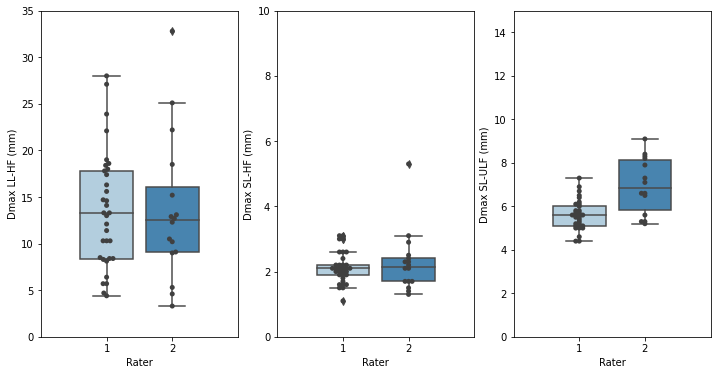

In [39]:
# load in IRR data
IRR_df = pd.read_excel('../docs/IRR_data_20210804.xlsx')
IRR_df

# boxplots of lesion measurements by rater
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(1,3,1)
ax1 = sns.boxplot(y="Dmax LL-HF (mm)", x='Rater', data=IRR_df, orient="v", palette="Blues")
ax1 = sns.swarmplot(y="Dmax LL-HF (mm)", x='Rater', data=IRR_df, orient="v", color=".25")
plt.axis([-1, 2, 0, 35])

ax2 = fig.add_subplot(1,3,2)
ax2 = sns.boxplot(y="Dmax SL-HF (mm)", x='Rater', data=IRR_df, orient="v", palette="Blues")
ax2 = sns.swarmplot(y="Dmax SL-HF (mm)", x='Rater', data=IRR_df, orient="v", color=".25")
plt.axis([-1, 2, 0, 10])

ax3 = fig.add_subplot(1,3,3)
ax3 = sns.boxplot(y="Dmax SL-ULF (mm)", x='Rater', data=IRR_df, orient="v", palette="Blues")
ax3 = sns.swarmplot(y="Dmax SL-ULF (mm)", x='Rater', data=IRR_df, orient="v", color=".25")
plt.axis([-1, 2, 0, 15])

(-1.0, 2.0, 0.0, 15.0)

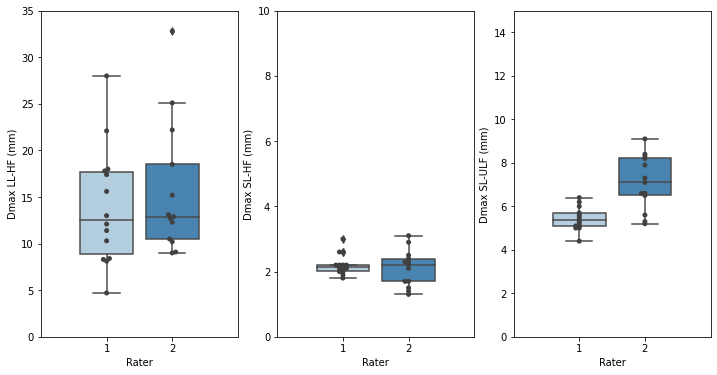

In [71]:
# limited to just images rated by both raters
drop_IDs = list(range(16,24)) + list(range(25,28)) + list([29]) + list(range(31,37)) + list([38])
IRR_limited_df = IRR_df.dropna(subset=['Dmax SL-ULF (mm)', 'Dmax SL-HF (mm)', 'Dmax LL-HF (mm)']).drop(index=drop_IDs)

# boxplots of lesion measurements by rater
fig = plt.figure(figsize = (12,6))
ax1 = fig.add_subplot(1,3,1)
ax1 = sns.boxplot(y="Dmax LL-HF (mm)", x='Rater', data=IRR_limited_df, orient="v", palette="Blues")
ax1 = sns.swarmplot(y="Dmax LL-HF (mm)", x='Rater', data=IRR_limited_df, orient="v", color=".25")
plt.axis([-1, 2, 0, 35])

ax2 = fig.add_subplot(1,3,2)
ax2 = sns.boxplot(y="Dmax SL-HF (mm)", x='Rater', data=IRR_limited_df, orient="v", palette="Blues")
ax2 = sns.swarmplot(y="Dmax SL-HF (mm)", x='Rater', data=IRR_limited_df, orient="v", color=".25")
plt.axis([-1, 2, 0, 10])

ax3 = fig.add_subplot(1,3,3)
ax3 = sns.boxplot(y="Dmax SL-ULF (mm)", x='Rater', data=IRR_limited_df, orient="v", palette="Blues")
ax3 = sns.swarmplot(y="Dmax SL-ULF (mm)", x='Rater', data=IRR_limited_df, orient="v", color=".25")
plt.axis([-1, 2, 0, 15])

In [20]:
# IRR - Large Lesion HF
icc = pg.intraclass_corr(data=IRR_df, targets='Exam', raters='Rater', ratings='Dmax LL-HF (mm)', nan_policy='omit')
icc.set_index('Type')

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.912589,21.880464,14,15,1.853930e-07,"[0.77, 0.97]"
ICC2,Single random raters,0.912600,21.939934,14,14,4.066296e-07,"[0.77, 0.97]"
ICC3,Single fixed raters,0.912816,21.939934,14,14,4.066296e-07,"[0.76, 0.97]"
ICC1k,Average raters absolute,0.954297,21.880464,14,15,1.853930e-07,"[0.87, 0.98]"
ICC2k,Average random raters,0.954303,21.939934,14,14,4.066296e-07,"[0.87, 0.98]"
ICC3k,Average fixed raters,0.954421,21.939934,14,14,4.066296e-07,"[0.86, 0.98]"


In [22]:
# IRR - Small Lesion HF
icc = pg.intraclass_corr(data=IRR_df, targets='Exam', raters='Rater', ratings='Dmax SL-HF (mm)', nan_policy='omit')
icc.set_index('Type')

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,0.139665,1.324675,14,15,0.297378,"[-0.37, 0.59]"
ICC2,Single random raters,0.130836,1.294118,14,14,0.318041,"[-0.4, 0.59]"
ICC3,Single fixed raters,0.128205,1.294118,14,14,0.318041,"[-0.39, 0.59]"
ICC1k,Average raters absolute,0.245098,1.324675,14,15,0.297378,"[-1.18, 0.74]"
ICC2k,Average random raters,0.231397,1.294118,14,14,0.318041,"[-1.35, 0.74]"
ICC3k,Average fixed raters,0.227273,1.294118,14,14,0.318041,"[-1.3, 0.74]"


In [23]:
# IRR - Small Lesion ULF
icc = pg.intraclass_corr(data=IRR_df, targets='Exam', raters='Rater', ratings='Dmax SL-ULF (mm)', nan_policy='omit')
icc.set_index('Type')

,Description,ICC,F,df1,df2,pval,CI95%
Type,,,,,,,
ICC1,Single raters absolute,-0.475869,0.355134,12,13,0.958773,"[-0.8, 0.07]"
ICC2,Single random raters,-0.048487,0.793376,12,12,0.652549,"[-0.23, 0.29]"
ICC3,Single fixed raters,-0.115215,0.793376,12,12,0.652549,"[-0.61, 0.44]"
ICC1k,Average raters absolute,-1.815838,0.355134,12,13,0.958773,"[-7.88, 0.13]"
ICC2k,Average random raters,-0.101916,0.793376,12,12,0.652549,"[-0.58, 0.45]"
ICC3k,Average fixed raters,-0.260436,0.793376,12,12,0.652549,"[-3.13, 0.62]"


#### Total lesion burden estimates

HF-MRI and ULF-MRI image sets were both processed with the same automated lesion segmentation algorithm. Initial qualitative review of segmentation overlays revealed similar patterns of lesion segmentation, particularly with respect to large periventricular lesions (Figure 2). Quantitative comparisons indicated that estimates of total lesion burden were highly correlated (R=0.90, p<0.00001) (Figure 3a). Mean lesion burden estimates were not significantly different (paired-t-test, t=0.82, p=0.42) between HF-MRI (12.1 ± 16.4 ml) and ULF-MRI (13.3 ± 10.1 ml).

A Bland-Altman plot for agreement between ULF and HF lesion burden estimates are presented in Figure 3b. The mean difference was 1 ml and the 95% limits of agreement were −17.9 to 15.5 ml. There was a significant correlation (Pearsons, R=0.75, p < 0.00001) between pairwise differences and averages, indicating that compared to HF the ULF segmentations overestimate for low lesion burdens and underestimate for high lesion burdens. Visual inspection revealed over-segmentation was predominantly in venous structures and subcortical tissue (Figure 4). Then ULFI T2-FLAIR sequenced used has flow-related hyperintensities in venous structures, which resulted in false-positive lesion detection.



In [18]:
# build volumes data table
sessions = ['ses-3T1', 'ses-64mT']
volumes_df = pd.DataFrame(columns=['ID', 'ses-3T1', 'ses-64mT'])

for sub in os.listdir('../analysis/mimosa_v2.0/'):
    
    # ignore none data items
    if sub[0] == '.':
        continue
    
    # build dataframe
    else:
        vols = []
        for sess in sessions:
            try:
                file = '../analysis/mimosa_v2.0/' + sub + '/' + sess + '/mimosa_binary_mask_0.2 2.nii.gz'
                img = ants.image_read(file)
                mm3 = img.spacing[0] * img.spacing[1] * img.spacing[2]
                vol = np.sum( img.numpy() ) * mm3 / 1000 # list volumes in cm3/ml
                vols.append(vol)
            except:
                vols.append(None)
    volumes_df = volumes_df.append({'ID': sub, 'ses-3T1': vols[0], 'ses-64mT': vols[1]}, ignore_index=True)

# drop healthy control and patients missing data
volumes_df = volumes_df.set_index('ID')
volumes_df = volumes_df.drop('sub-P002') # healthy volunteer
#volumes_df = volumes_df.drop('sub-P010') # missing 3T data
volumes_df = volumes_df.drop('sub-P040') # missing 3T data
volumes_df.sort_values("ID")

,ses-3T1,ses-64mT
ID,,
sub-P001,3.881000,7.044150
sub-P003,6.585600,3.404667
sub-P004,56.093188,31.985951
sub-P005,8.800008,17.432920
sub-P006,0.332000,8.332475
sub-P007,0.055000,5.618981
sub-P008,49.036000,37.220947
sub-P009,1.533000,10.277999
sub-P010,0.784942,9.625224


In [19]:
# basic stats on volume comparison

# mean and std
mean_std(volumes_df, 'ses-3T1', 1)
mean_std(volumes_df, 'ses-64mT', 1)

# compare mean lesion burden estimates between HF-MRI and ULF-MRI (paired t-test)
scipy.stats.ttest_rel( volumes_df['ses-64mT'], volumes_df['ses-3T1'] )

ses-3T1: 12.1 +/- 16.4
ses-64mT: 13.3 +/- 10.1


Ttest_relResult(statistic=0.8208452784422385, pvalue=0.4176248803035697)

#### Fig 4A

Pearson's corr: R = 0.8983659016795074 P = 5.704587282687725e-13


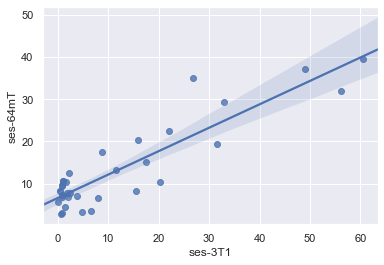

In [20]:
# correlate 3T1 and 64mT volumes
sns.set_theme(color_codes=True)
ax = sns.regplot(x="ses-3T1", y="ses-64mT", data=volumes_df, truncate=False)
r, p = scipy.stats.pearsonr( volumes_df['ses-3T1'], volumes_df['ses-64mT'])
print('Pearson\'s corr: R = '+ str(r) + ' P = ' + str(p) )

#### Fig 4B

/Users/tcarnold/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



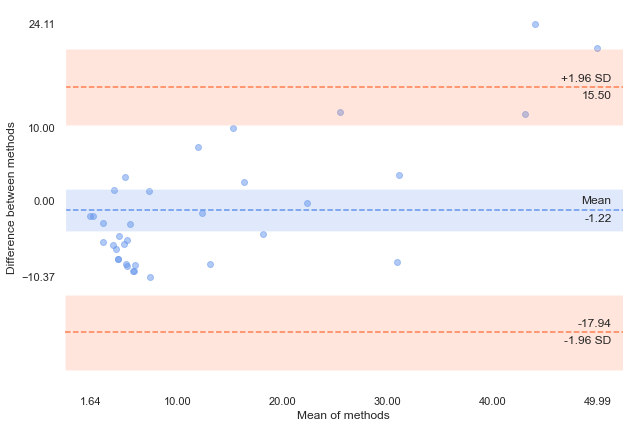

R = 0.7507672811646513 P = 3.1506043597229314e-07


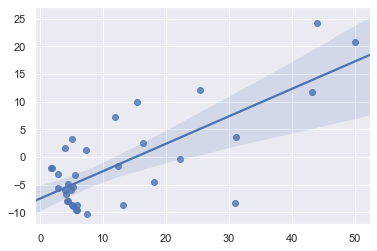

In [30]:
# Bland-Altman using pyCompare
pyCompare.blandAltman(volumes_df['ses-3T1'], volumes_df['ses-64mT'])

# get correlation
y = volumes_df['ses-3T1']-volumes_df['ses-64mT']
x = (volumes_df['ses-3T1']+volumes_df['ses-64mT'])/2
ax = sns.regplot(x=x, y=y, truncate=False)
r, p = scipy.stats.pearsonr( x, y)
print('R = ' + str(r) +' P = ' + str(p) )

#### Dice overlap analysis
Across subjects, there was a wide range in segmentation overlap between HF-MRI and ULF-MRI (DSC: mean 0.23, max 0.64, min 0), with automated segmentations overlapping in 31/34 patients. To characterize the full range of segmentation quality across the dataset, Figure S2 illustrates segmentations from each quartile of the DSC distribution. Larger lesion size is frequently associated with a higher DSC (Oguz et al., 2017). We found in our dataset total lesion burden at HF-MRI was highly correlated with DSC (Pearsons, R=0.82, p < 0.00001).


In [44]:
# Rigid coregister post FLAIR to pre FLAIR
N = len(volumes_df)
DSC = []
subs = []
lesions_df = pd.DataFrame(columns=['sub_ID', 'lesion_ID', 'vol', 'overlap','intensity'])

for sub in os.listdir('../analysis/mimosa_v2.0/'):
    
    # ignore none data items
    if sub[0] == '.':
        continue
    elif sub == 'sub-P002':
        continue
#     elif sub == 'sub-P010':
#         continue
    elif sub == 'sub-P040':
        continue
    else:
    
        # load in 3T1 FLAIR image
        file = '../analysis/mimosa_v2.0/' + sub + '/ses-3T1/flair_n4_reg2t1n4.nii.gz'
        fixed = ants.image_read(file)
        file = '../analysis/mimosa_v2.0/' + sub + '/ses-3T1/mimosa_binary_mask_0.2.nii.gz'    
        mask = ants.image_read(file)
        mask_3T1 = mask # store for DSC w/ 64mT later

        ### coregister 64mT ###

        # load in 64mT FLAIR image
        file = '../analysis/mimosa_v2.0/' + sub + '/ses-64mT/flair_n4_reg2t1n4.nii.gz'
        moving = ants.image_read(file)
        file = '../analysis/mimosa_v2.0/' + sub + '/ses-64mT/mimosa_binary_mask_0.2.nii.gz'    
        mask = ants.image_read(file)

        mytx = ants.registration(fixed=fixed , 
                                 moving=moving, 
                                 type_of_transform='DenseRigid' ) # rigid regisration

        # warp binary mask to 3T1 space
        warped_img = ants.apply_transforms( fixed=fixed, 
                                              moving=moving, 
                                              transformlist=mytx['fwdtransforms'], 
                                              interpolator='linear')
        
        warped_mask = ants.apply_transforms( fixed=fixed, 
                                              moving=mask, 
                                              transformlist=mytx['fwdtransforms'], 
                                              interpolator='nearestNeighbor')

        # calculate DSC
        DSC.append( dice(warped_mask.numpy(), mask_3T1.numpy()) )
        subs.append( sub )
        
        # add dataFrame
        subject_df = lesion_overlap_intensity(mask_3T1.numpy(), warped_mask.numpy(), warped_img.numpy())
        subject_df['sub_ID'] = sub
        lesions_df = lesions_df.append(subject_df)

# convert volumes ml
lesions_df['vol (ml)'] = lesions_df['vol'] * 0.001 # convert to ml  

# add DSC to table and print
volumes_df['DSC'] = DSC
volumes_df.sort_values(by=['DSC'])

/Users/tcarnold/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,ses-3T1,ses-64mT,DSC
ID,,,
sub-P007,0.055000,5.618981,0.000000
sub-P044,0.348091,8.345274,0.000000
sub-P011,2.191000,12.556310,0.000000
sub-P045,0.856400,6.860532,0.001949
sub-P030,0.768661,9.354450,0.003925
sub-P038,2.453802,7.802925,0.020294
sub-P013,0.787000,7.398111,0.027243
sub-P032,1.346588,4.394100,0.027315
sub-P022,0.888824,2.910525,0.027702


In [40]:
# box-plot & basic stats
mean_std(volumes_df,'DSC', 2)
print('Max: ' + str(np.max(volumes_df['DSC'])) +' , Min: ' + str(np.min(volumes_df['DSC'])) )
print(volumes_df['DSC'].sort_values())
fig = plt.figure(figsize = (2,6))
ax = sns.boxplot(y="DSC", data=volumes_df, orient="v")
ax = sns.swarmplot(y="DSC", data=volumes_df, orient="v", color=".25")

NameError: name 'volumes_df' is not defined

/Users/tcarnold/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



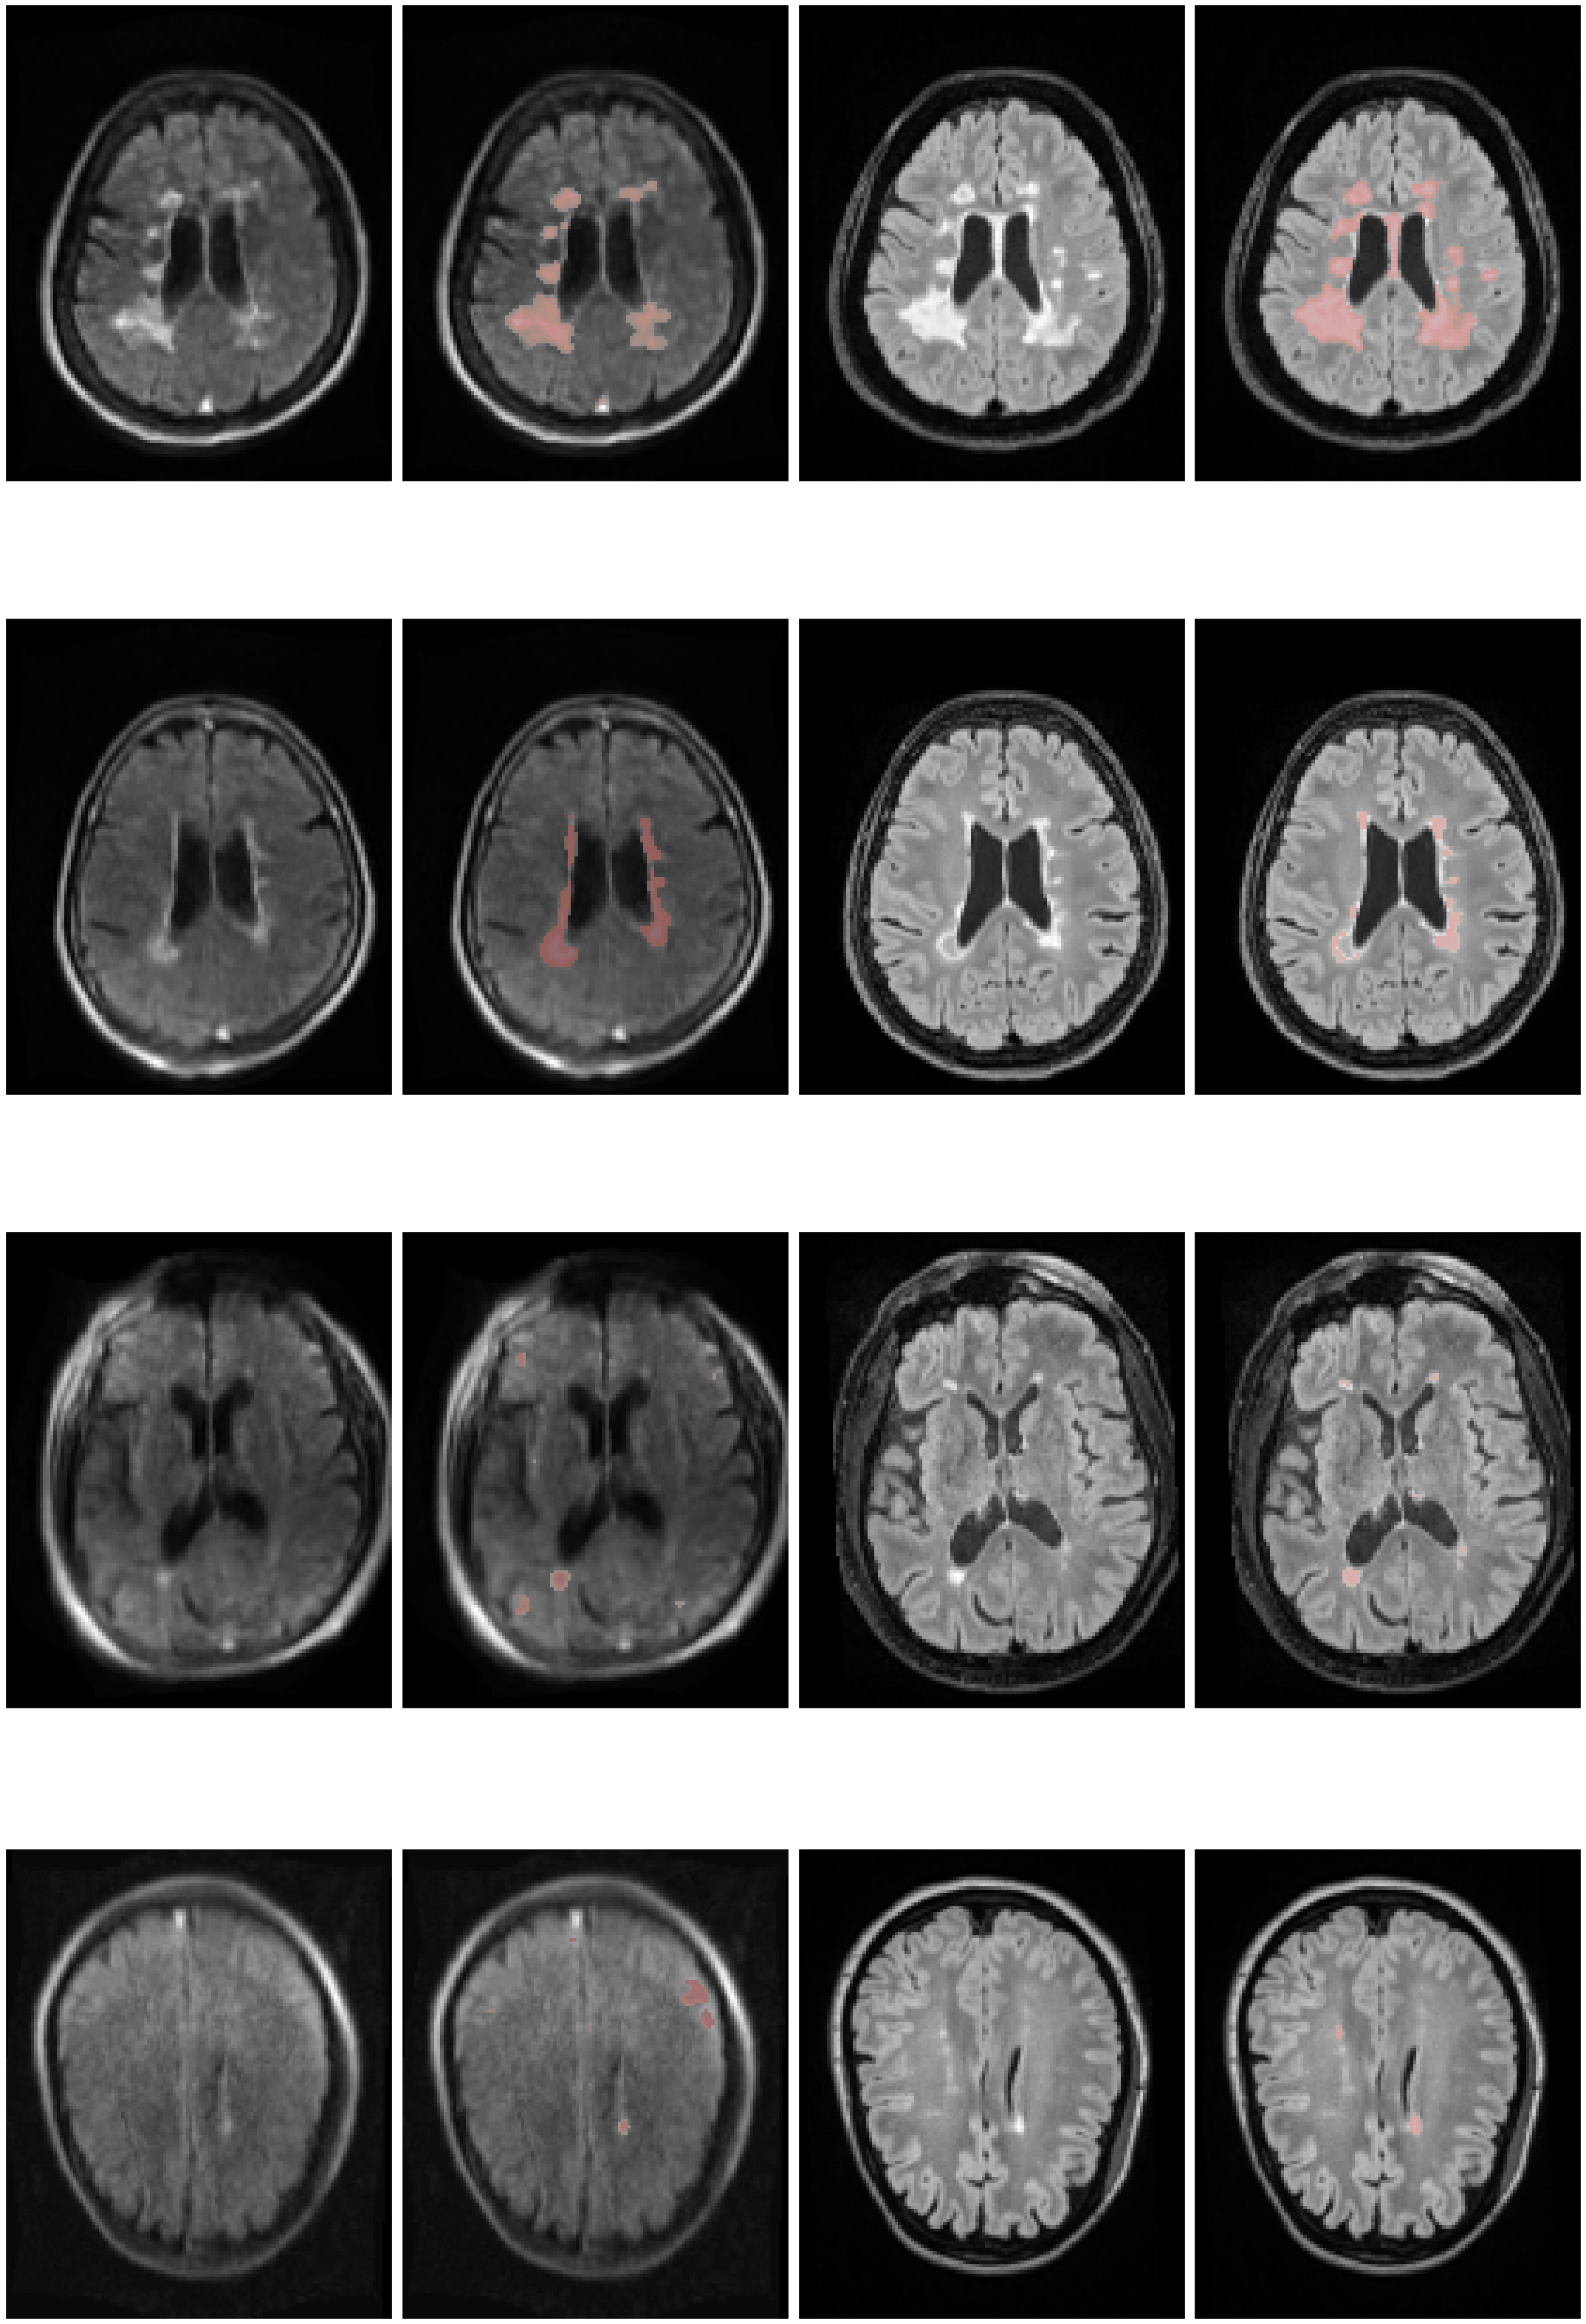

In [46]:
# Plot images with segmentation overlays
fig = plt.figure(figsize = (30,48)) # create a 5 x 5 figure 

# subjects to plot
subject_IDs = ['sub-P008','sub-P005','sub-P003','sub-P032']
N = len(subject_IDs)

n = 0 # loop counter for subplot 
for sub in subject_IDs:
    
    # ignore none data items
    if sub[0] == '.':
        continue
    
    # load in 64mT FLAIR image
    file = '../analysis/mimosa_v2.0/' + sub +'/ses-64mT/flair_n4_reg2t1n4.nii.gz'
    fixed = ants.image_read(file)
    file = '../analysis/mimosa_v2.0/' + sub +'/ses-64mT/mimosa_binary_mask_0.2.nii.gz'    
    mask = ants.image_read(file)
    mask_64mT = mask # store for DSC w/ 3T later
    
    # find slice with maximal lesion burden
    idx = mask_idx( mask )
    idx = mask_idx( mask )
    img = fixed[:,:,idx]
    mask = mask[:,:,idx]
    
    # plot 64mT image
    ax1 = fig.add_subplot(N,4,1+n)
    mask = np.ma.masked_where(mask == 0,img)
    ax1.imshow( np.rot90(img, k=3) , cmap='gray', interpolation='none')
    ax1.grid(False)
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # plot with segmentation overlay
    ax2 = fig.add_subplot(N,4,2+n)
    mask = np.ma.masked_where(mask == 0,img)
    ax2.imshow(np.rot90(img, k=3), cmap='gray', interpolation='none')
    ax2.imshow(np.rot90(mask, k=3), cmap='Reds', interpolation='none', alpha=0.3)
    ax2.grid(False)
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    ### coregister 3T ###
    
    # load in 3T1 FLAIR image
    file = '../analysis/mimosa_v2.0/' + sub +'/ses-3T1/flair_n4_reg2t1n4.nii.gz'
    moving = ants.image_read(file)
    file = '../analysis/mimosa_v2.0/' + sub +'/ses-3T1/mimosa_binary_mask_0.2.nii.gz'    
    mask = ants.image_read(file)
        
    mytx = ants.registration(fixed=fixed , 
                             moving=moving, 
                             type_of_transform='Rigid' ) # rigid regisration
    
    # warp binary mask to 3T1 space
    warped_img = ants.apply_transforms( fixed=fixed, 
                                          moving=moving, 
                                          transformlist=mytx['fwdtransforms'], 
                                          interpolator='linear')
    warped_img_slice = warped_img.numpy()[:,:,idx]
    warped_mask = ants.apply_transforms( fixed=fixed, 
                                          moving=mask, 
                                          transformlist=mytx['fwdtransforms'], 
                                          interpolator='nearestNeighbor')
    warped_mask_slice = warped_mask.numpy()[:,:,idx]
    
    # plot
    ax3 = fig.add_subplot(N,4,3+n)
    warped_mask_slice = np.ma.masked_where(warped_mask_slice == 0,warped_img_slice)
    ax3.imshow(np.rot90(warped_img_slice, k=3), cmap='gray',  interpolation='none')
    ax3.grid(False)
    ax3.set_xticks([])
    ax3.set_yticks([])
    
    # plot
    ax4 = fig.add_subplot(N,4,4+n)
    warped_mask_slice = np.ma.masked_where(warped_mask_slice == 0,warped_img_slice)
    ax4.imshow(np.rot90(warped_img_slice, k=3), cmap='gray',  interpolation='none')
    ax4.imshow(np.rot90(warped_mask_slice, k=3), cmap='Reds', interpolation='none', alpha=0.3)
    ax4.grid(False)
    ax4.set_xticks([])
    ax4.set_yticks([])
    n=n+4
    
plt.tight_layout()

In [53]:
volumes_df.sort_values('ses-3T1')

,ses-3T1,ses-64mT,DSC
ID,,,
sub-P007,0.055000,5.618981,0.000000
sub-P006,0.332000,8.332475,0.038826
sub-P044,0.348091,8.345274,0.000000
sub-P012,0.604000,2.675096,0.120328
sub-P030,0.768661,9.354450,0.003925
sub-P010,0.784942,9.625224,0.042191
sub-P013,0.787000,7.398111,0.027243
sub-P045,0.856400,6.860532,0.001949
sub-P022,0.888824,2.910525,0.027702


Pearson's corr: R = 0.8151544258103022 P = 4.365714636941184e-09


/Users/tcarnold/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



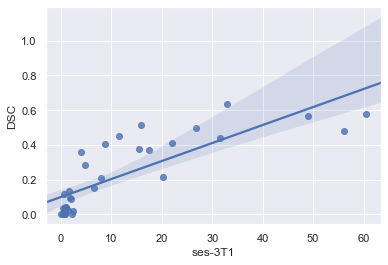

In [54]:
# correlate DSC and lesion volume
ax = sns.regplot(x="ses-3T1", y="DSC", data=volumes_df, truncate=False)
r, p = scipy.stats.pearsonr( volumes_df['ses-3T1'], volumes_df['DSC'])
print('Pearson\'s corr: R = '+ str(r) + ' P = ' + str(p) )

#### Lesion level analysis (connected components analysis)
In each segmentation, individual lesions were identified using connected-components analysis (Boudraa et al., 2000). For each lesion, volume and mean intensity were quantified. The true-positive rate (TPR) was calculated across a range of lesion size and intensity thresholds (Figure 5). The TPR increases dramatically as lesion size increases, reaching 83% for lesions >0.5 ml and 100% for lesions >1.5 ml. TPR also increases with mean lesion intensity, however detection rate plateaus between 35–50%, indicating that hyperintensity is less important than size in accurate lesion identification.



#### Fig 7A

/Users/tcarnold/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



0.8301886792452831
0.9298245614035088
1.0


(0.0, 2.5, 0.0, 1.1)

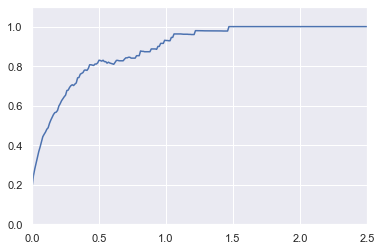

In [55]:
# plot cumulative lesion detection rate as a function of lesion size
cumf = []
for thres in np.arange(0,np.max(lesions_df['vol (ml)']),0.01):
    data = lesions_df[lesions_df['vol (ml)']>thres]
    N = data.shape[0]
    cumf.append( np.sum(data['overlap']>0) / N ) 
    
print(cumf[50])
print(cumf[100])
print(cumf[150])
ax = plt.plot(np.arange(0,np.max(lesions_df['vol (ml)']),0.01), cumf)
plt.axis([0, 2.5, 0, 1.1])

#### Fig 7B

/Users/tcarnold/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



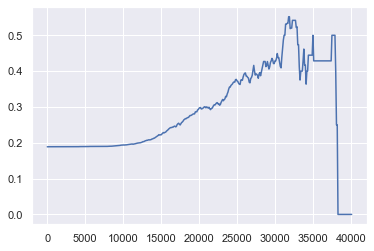

In [56]:
# plot cumulative lesion detection rate as a function of lesion intensity
cumf = []
for thres in np.arange(np.min(lesions_df['intensity']),np.max(lesions_df['intensity']),100):
    data = lesions_df[lesions_df['intensity']>thres]
    N = data.shape[0]
    cumf.append( np.sum(data['overlap']>0) / N ) 
    
ax = plt.plot(np.arange(np.min(lesions_df['intensity']),np.max(lesions_df['intensity']),100), cumf)


#### Multiacquisition averaging
In one subject, a 3x4x5 mm subcortical lesion was evident near the left middle frontal gyrus on 3T (Figure 6, top row) but not in a single ultra-low-field acquisition (Figure 6, bottom row). Using four to eight multi-acquisition volume averages, the lesion was detectable on the ultra-low-field system and lesion intensity relative to contralateral white matter steadily increased with more acquisitions. With eight volume averages, there was a 34% increase in lesion conspicuity which was equivalent to 69% of 3T conspicuity.


/Users/tcarnold/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Single Acquisition


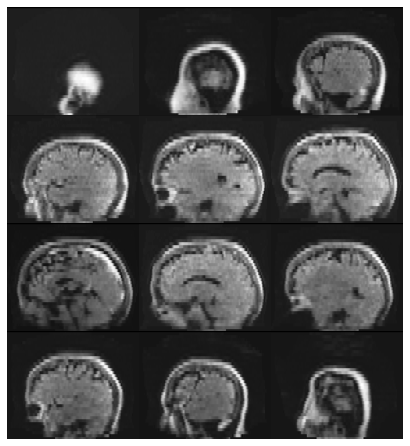

Multi-Acquisition Average


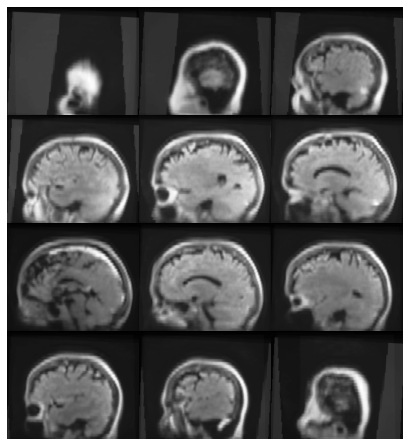

In [51]:
# print out a single acqusition and the multi-acquisition average for comparison

# get root filepath
root = pathlib.Path(r'../data/P045_highResFlair/patient5887270365381944633')

avg_img = []
n = 0

# loop through and iteratively average images
for file in root.rglob('*FLAIR*.nii.gz'):
    
    file = str(file) # convert file to string
    
    # if first image, just reslice and set to fixed
    if n == 0:
        fixed = ants.image_read( file )
        fixed = ants.resample_image(fixed,(1,1,1),False,1) # 1mm isotropic, NearestNeighbor
        cum_img = fixed.numpy()
        
        # plot a single acquistion
        print('Single Acquisition')
        ants.plot( fixed )
        
    else:
        moving = ants.image_read( file )
        moving = ants.resample_image(moving,(1,1,1),False,1) # 1mm isotropic, NearestNeighbor
        mytx = ants.registration(fixed=fixed, moving=moving, type_of_transform = 'TRSAA')
        mywarpedimage = ants.apply_transforms( fixed=fixed, moving=moving,
                                           transformlist=mytx['fwdtransforms'], interpolator='linear')
        cum_img = cum_img + mywarpedimage.numpy()
        
    n=n+1 # increase image counter
        
    # make average
    avg_img = cum_img / n

    # make ants image and plot
    # avg_img = ants.from_numpy( avg_img, origin=fixed.origin, spacing=[1,1,1], direction=fixed.direction)
    avg_img = ants.from_numpy( avg_img, origin=fixed.origin, spacing=fixed.spacing, direction=fixed.direction)

    # save output
    ants.image_write(avg_img, '../analysis/multi-acquisition_average/P045_N' + str(n) + 'avg.nii.gz', ri=True)
    
# plot multi-acquistion average
print('Multi-Acquisition Average')
ants.plot( avg_img )

## Discussion
In this study, we compared manual and automated lesion detection in paired 64mT ULF-MRI and clinical 3T images. In ultra-low-field images, neuroradiologists were able to detect white matter lesions in 31/33 patients (94%) with discernible pathology on 3T imaging. One subject with CIS was confirmed lesion negative on both systems. An automated lesion segmentation algorithm detected overlapping lesions in 31/34 patients (91%). Estimates of total lesion burden on ULF-MRI were not significantly different from HF-MRI estimates (ULF-MRI: 13.3 ml, HF-MRI: 12.1 ml , p>0.05). However, Bland-Altman analysis indicated that ULF-MRI was biased, over-segmenting low lesion burden and under-segmenting high burden. Visual inspection revealed that hyperintense venous structures on FLAIR contributed to false-positive detections. ULF-MRI had an 83% detection rate for lesions < 0.5 ml and 100% for lesions < 1.5 ml. With multi-acquisition image averaging, lesions as small as 0.06 ml were discernible on ULF-MRI. Together, these results suggest that ULF-MRI combined with automated lesion segmentation methods could have diagnostic utility in the context of MS.

Our investigation is motivated by recent advances in hardware development and reconstruction software that address the reduced signal-to-noise associated with ULF-MRI. Commercial MRI systems have predominantly trended towards higher field strengths, with lower-field strength systems relegated to niche applications (Marques et al., 2019 & Campbell-Washburn et al., 2019). Today, there are commercially available ULF-MRI systems with FDA clearance for broad indications[cite]. Emerging research has demonstrated that even relatively subtle pathologies, such as CNS demyelination, can be detected in low-field systems (Mateen et al., 2021), which prompts the re-evaluation of these devices for a range of clinical applications. 

The lower costs and infrastructure requirements of ULF-MRI make it an attractive alternative to HF-MRI in situations where there are extreme disparities in access to healthcare and MRI technology (Marques et al., 2019). While HF-MRI will likely remain the diagnostic tool of choice in urban areas of developed countries, portable ULF-MRI could expand clinical options for patients in low and middle income countries (Maru et al. 2009). Within the United States 60% of rural hospitals lack an on-site MRI (Ginde et al., 2008). Mobile MRI units could bring emergency imaging to patients (Deoni et al., 2021), providing an invaluable service to sparsely populated areas and individuals that cannot travel (McLane et al., 2015).

The lower cost and ease of use associated with ULF-MRI could also impact how early and frequently patients can be imaged. Rovira et al. predicted which individuals would develop clinically definite MS using an MRI collected only 3 months prior to the patient's initial symptom onset (Rovira et al., 2009). While it remains unknown if ULF-MRI would be sensitive enough to assess subtle pathologies in an early clinical course, our work demonstrated consistent radiological reads between HF-MRI and ULF-MRI and the ability to detect lesions as small as 3x4x5 mm. Low cost ULF-MRI could also potentially increase the frequency of patient imaging. A clinician's perspective of disease progression is often based on annual snapshots. However, pathologies characterized by flares, such as MS, can have highly variable presentations [cite]. Although not assessed in the present study, increased scanning frequency could potentially provide a better longitudinal perspective of clinical progression and permit enhanced disease monitoring, disability prediction, and measures of treatment response (Wattjes et al., 2015). 

ULF-MRI devices also offer the potential to conduct large-scale, cost-effective studies of high-risk individuals. In MS, high-risk asymptomatic family members have an increased incidence of neurological dysfunction and neuroimaging findings associated with MS (Xia et al., 2017). Additionally, patients with radiologically isolated syndrome (RIS) (i.e., those who meet criteria for MS radiologically, but are asymptomatic) are known to be at high risk for conversion to MS (Hossieny et al., 2020). However, studies of asymptomatic individuals require large sample sizes which cause recruitment and cost restraints (ARISE - Okuda et al., 2015). Reducing the cost of imaging could significantly impact the type of population based and longitudinal studies available to researchers.

While automated machine learning methods for lesion segmentation have yet to consistently outperform manual segmentation, they are less costly and prone to subjectivity compared to their manual counterparts (Valcarcel et al. 2018a). Combining ULF-MRI with automated techniques can further address barriers to MRI access by reducing the need for trained practitioners to interpret MRI scans. Our work illustrates the importance of reassessing algorithm performance at ULF-MRI and indicates that retraining or tuning may be necessary to address differences in image quality and tissue contrast. In practice, an automated segmentation may not fully replace delineations by hand, but could be used as a biomarker for determining eligibility or endpoints in a clinical trial, or as a starting point for further manual refinements.

There are several limitations of our work. Our analysis treated 3T lesion segmentations as ground-truth, though MS lesion segmentation is known to be challenging even at high-field strengths. We only evaluated a single segmentation method and results may not generalize to other algorithms. Additionally, our work is a cross-sectional assessment of detection and segmentation capacity and does not assess the ability to track lesion growth over time or relate our findings to clinical variables. Future work will be needed to evaluate ULF-MRI systems and their capacity to carry out specific clinical functions.

In conclusion, increased imaging capabilities of ULF-MRI systems warrants their re-evaluation across a range of pathologies and indications. We found that ULF-MRI was sensitive to white-matter lesions and that an automated algorithm designed for 3T image segmentation could be applied to ultra-low-field data. These findings highlight many promising avenues to more accessible imaging technologies for MS around the world.



## References

1. Reich, D. S., Lucchinetti, C. F., & Calabresi, P. A. (2018). Multiple Sclerosis. New England Journal of Medicine, 378(2), 169–180. https://doi.org/10.1056/nejmra1401483
2. Noyes, Katia, and Bianca Weinstock-Guttman. "Impact of diagnosis and early treatment on the course of multiple sclerosis." Am J Manag Care 19.17 Suppl (2013): s321-31.
3. Thompson, A. J., Banwell, B. L., Barkhof, F., Carroll, W. M., Coetzee, T., Comi, G., Correale, J., Fazekas, F., Filippi, M., Freedman, M. S., Fujihara, K., Galetta, S. L., Hartung, H. P., Kappos, L., Lublin, F. D., Marrie, R. A., Miller, A. E., Miller, D. H., Montalban, X., … Cohen, J. A. (2018). Diagnosis of multiple sclerosis: 2017 revisions of the McDonald criteria. The Lancet Neurology, 17(2), 162–173. https://doi.org/10.1016/s1474-4422(17)30470-2
4. Filippi, M., Preziosa, P., Banwell, B. L., Barkhof, F., Ciccarelli, O., Stefano, N. D., Geurts, J. J. G., Paul, F., Reich, D. S., Toosy, A. T., Traboulsee, A., Wattjes, M. P., Yousry, T. A., Gass, A., Lubetzki, C., Weinshenker, B. G., & Rocca, M. A. (2019). Assessment of lesions on magnetic resonance imaging in multiple sclerosis: practical guidelines. Brain : A Journal of Neurology, 142(7), 1858–1875. https://doi.org/10.1093/brain/awz144
5. Briggs, Farren BS, and Eddie Hill. "Estimating the prevalence of multiple sclerosis using 56.6 million electronic health records from the United States." Multiple Sclerosis Journal 26.14 (2020): 1948-1952.
6. Wallin, M. T., Culpepper, W. J., Campbell, J. D., Nelson, L. M., Langer-Gould, A., Marrie, R. A., Cutter, G. R., Kaye, W. E., Wagner, L., Tremlett, H., Buka, S. L., Dilokthornsakul, P., Topol, B., Chen, L. H., LaRocca, N. G., & Workgroup, U. M. S. P. (2019). The prevalence of MS in the United States: A population-based estimate using health claims data. Neurology, 92(10), 10.1212/WNL.0000000000007035. https://doi.org/10.1212/wnl.0000000000007035
7. Tullman MJ. Overview of the epidemiology, diagnosis, and disease progression associated with multiple sclerosis. Am J Manag Care 2013; 19(2 Suppl.): S15–S20.
8. Latourette, Matthew T., et al. "Magnetic resonance imaging research in sub-Saharan Africa: challenges and satellite-based networking implementation." Journal of digital imaging 24.4 (2011): 729-738.
9. Marques, José P., Frank FJ Simonis, and Andrew G. Webb. "Low‐field MRI: An MR physics perspective." Journal of magnetic resonance imaging 49.6 (2019): 1528-1542.
10. Ogbole, Godwin Inalegwu, et al. "Survey of magnetic resonance imaging availability in West Africa." Pan African Medical Journal 30.1 (2018).
11. Maru, Duncan Smith-Rohrberg, et al. "Turning a blind eye: the mobilization of radiology services in resource-poor regions." Globalization and health 6.1 (2010): 1-8.
12. Wald, Lawrence L., et al. "Low‐cost and portable MRI." Journal of Magnetic Resonance Imaging 52.3 (2020): 686-696.
13. Campbell-Washburn, Adrienne E., et al. "Opportunities in interventional and diagnostic imaging by using high-performance low-field-strength MRI." Radiology 293.2 (2019): 384-393.
14. Tu, Danni, et al. "Automated Analysis of Low-Field Brain MRI in Cerebral Malaria." bioRxiv (2021): 2020-12.
15. Sheth, Kevin N., et al. "Assessment of brain injury using portable, low-field magnetic resonance imaging at the bedside of critically ill patients." JAMA neurology 78.1 (2021): 41-47.
16. Turpin, Justin, et al. "Portable Magnetic Resonance Imaging for ICU Patients." Critical care explorations 2.12 (2020).
17. Mateen, Farrah J., et al. "Low-field Portable Brain MRI in CNS Demyelinating Disease." Multiple Sclerosis and Related Disorders (2021): 102903.
18. Wattjes, M. P., et al. “MAGNIMS consensus guidelines on the use of MRI in multiple sclerosis—establishing disease prognosis and monitoring patients.” Nature Reviews Neurology vol. 11 (2015): 597-606.
19. García-Lorenzo, Daniel, et al. "Review of automatic segmentation methods of multiple sclerosis white matter lesions on conventional magnetic resonance imaging." Medical image analysis 17.1 (2013): 1-18.
20. Yushkevich, Paul A., et al. "User-guided 3D active contour segmentation of anatomical structures: significantly improved efficiency and reliability." Neuroimage 31.3 (2006): 1116-1128.
21. Tustison, Nicholas J., et al. "N4ITK: improved N3 bias correction." IEEE transactions on medical imaging 29.6 (2010): 1310-1320.
22. Shinohara, Russell T., et al. "Statistical normalization techniques for magnetic resonance imaging." NeuroImage: Clinical 6 (2014): 9-19.
23. Valcarcel, Alessandra M., et al. "MIMoSA: an automated method for intermodal segmentation analysis of multiple sclerosis brain lesions." Journal of Neuroimaging 28.4 (2018): 389-398.
24. Valcarcel, Alessandra M et al. “A dual modeling approach to automatic segmentation of cerebral T2 hyperintensities and T1 black holes in multiple sclerosis.” NeuroImage. Clinical vol. 20 (2018): 1211-1221. doi:10.1016/j.nicl.2018.10.013.
25. Oguz, Ipek, et al. "Dice overlap measures for objects of unknown number: application to lesion segmentation." International MICCAI Brainlesion Workshop. Springer, Cham, 2017.
26. Boudraa, Abdel-Ouahab, et al. "Automated segmentation of multiple sclerosis lesions in multispectral MR imaging using fuzzy clustering." Computers in biology and medicine 30.1 (2000): 23-40.
27. Jovicich, Jorge, et al. "MRI-derived measurements of human subcortical, ventricular and intracranial brain volumes: reliability effects of scan sessions, acquisition sequences, data analyses, scanner upgrade, scanner vendors and field strengths." Neuroimage 46.1 (2009): 177-192.
28. Sarracanie, Mathieu, and Najat Salameh. "Low-field MRI: how low can we go? A fresh view on an old debate." Frontiers in Physics 8 (2020): 172.
29. Ginde, Adit A., et al. "Availability and quality of computed tomography and magnetic resonance imaging equipment in US emergency departments." Academic emergency medicine 15.8 (2008): 780-783.
30. Deoni, Sean CL, et al. "Accessible Pediatric Neuroimaging using a Low Field Strength MRI Scanner." NeuroImage (2021): 118273.
31. McLane, Hannah C., et al. "Availability, accessibility, and affordability of neurodiagnostic tests in 37 countries." Neurology 85.18 (2015): 1614-1622.
32. Rovira, Àlex, et al. "A single, early magnetic resonance imaging study in the diagnosis of multiple sclerosis." Archives of neurology 66.5 (2009): 587-592.
33. Xia, Zongqi, et al. "Assessment of early evidence of multiple sclerosis in a prospective study of asymptomatic high-risk family members." JAMA neurology 74.3 (2017): 293-300.
34. Hosseiny, M., S. D. Newsome, and D. M. Yousem. "Radiologically isolated syndrome: A review for neuroradiologists." American Journal of Neuroradiology 41.9 (2020): 1542-1549.
35. Okuda, Darin, et al. "Multi-center, randomized, double-blinded assessment of dimethyl fumarate in extending the time to a first attack in radiologically isolated syndrome (RIS)(ARISE Trial)." Neurology Supplemental pg.207 (2015).